In [6]:
from src import Pipeline, Plotter
from src.utils.utils_experiment import load_data
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = 'spleen'
X, ids = load_data(dataset)
pipe = Pipeline(X, config='configs/'+dataset+".ini", verbose=True, col_ids=ids)
#pipe.run()

In [3]:
pipe.save_plot_info()
pipe.save_marker_info()

In [11]:
plotter = Plotter(pipe)

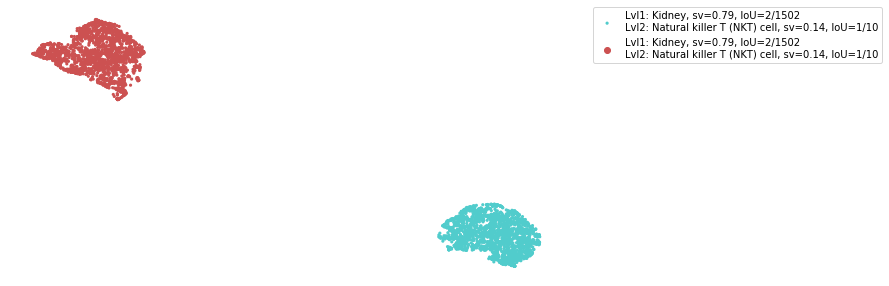

In [13]:
plotter.plot_clu()